<h1 style="text-align:center;font-size:30px;" > Car Price Prediction </h1>

<h1> 1. Business Problem </h1>

<h2> 1.1 Description </h2>

<p> Source: https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho </p>
<p> Data: www.cardekho.com</p>
<p> Download data.csv from Kaggle.</p>

<h6> Problem statement : </h6>
<p> Predict the selling price of a car. </p>

<h2>1.2. Source/Useful Links</h2>

Useful Links
1. https://www.youtube.com/watch?v=p_tpQSY1aTs
2. https://www.kaggle.com/nehalbirla/vehicle-dataset-from-cardekho/discussion/163575

<h2>1.3. Real-world/Business objectives and constraints.</h2>

* No strict low-latency requirement.
* Interpretability is not so important.
* Errors should be low.

<h1>2. Machine Learning Problem</h1>

<h2>2.1. Data</h2>

<h3> 2.1.1 Data Overview </h3>

<p> 
- Data will be in a file car data.csv <br>
- car data.csv contains 9 columns : Car_Name, Year, Selling_Price, Present_Price, Kms_Driven, Fuel_Type, Seller_Type, Transmission, Owner <br>
- Size of Train.csv - 17KB <br>
- Number of rows in car data.csv = 301
</p>

<h3>2.1.2. Example Data Point</h3>

<pre>
"Car_Name","Year","Selling_Price","Present_Price","Kms_Driven","Fuel_Type","Seller_Type","Transmission","Owner"
"ritz","2014","3.35","5.59","27000","Petrol","Dealer","Manual","0"
"sx4","2013","4.75","9.54","43000","Diesel","Dealer","Manual","0"
"ciaz","2017","7.25","9.85","6900","Petrol","Dealer","Manual","0"
"wagon r","2011","2.85","4.15","5200","Petrol","Dealer","Manual","0"
</pre>

<h2> 2.2 Mapping the real world problem to an ML problem </h2>

<h3> 2.2.1 Type of Machine Leaning Problem </h3>

<p> It is a regression problem, we have to predict car selling price. </p>

<h3> 2.2.2 Performance Metric </h3>

Metric(s):
* Mean Squared Error (MSE)

<h2> 2.3 Train and Test Construction </h2>

<p>  </p>
<p> We build train and test by randomly splitting in the ratio of 80:20. </p>

<h1>3. Exploratory Data Analysis </h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import xgboost

<h2>3.1. Reading Data</h2>

In [2]:
df = pd.read_csv("car data.csv")

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
print(df['Fuel_Type'].unique())
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [7]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [8]:
df['Car_Name'].value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
camry                        1
s cross                      1
Hero Super Splendor          1
800                          1
Bajaj Avenger 150 street     1
Name: Car_Name, Length: 98, dtype: int64

<h2>3.2. Visualizing data of categorical features</h2>

<h3>3.1. Fuel Type</h3>

<AxesSubplot:xlabel='Fuel_Type', ylabel='Selling_Price'>

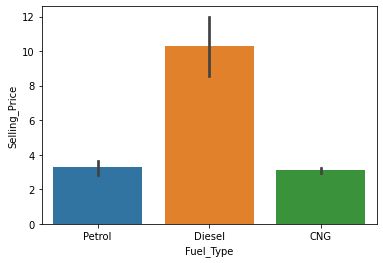

In [9]:
sns.barplot(x='Fuel_Type', y='Selling_Price', data=df)

The cars with diesel engines are found to have the highest selling price amongst Petrol and CNG engines.

<h3>3.2. Seller Type</h3>

<AxesSubplot:xlabel='Seller_Type', ylabel='Selling_Price'>

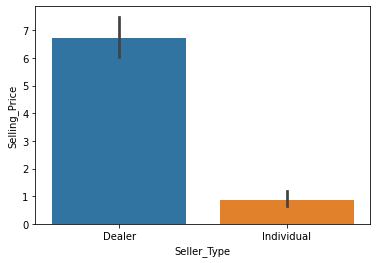

In [10]:
sns.barplot(x='Seller_Type', y='Selling_Price', data=df)

The selling price of cars that the dealers are selling are higher than individual sellers.

<h3>3.3. Transmission</h3>

<AxesSubplot:xlabel='Transmission', ylabel='Selling_Price'>

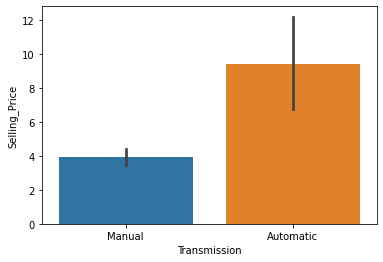

In [11]:
sns.barplot(x='Transmission', y='Selling_Price', data=df)

It can be observed that the automatic tranmission cars have higher resale value than the manual ones.

<h3>3.4. Owner</h3>

<AxesSubplot:xlabel='Owner', ylabel='Selling_Price'>

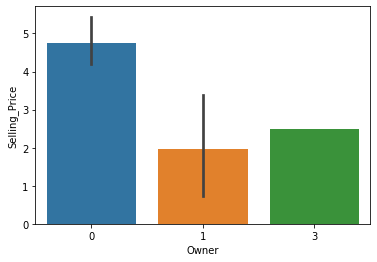

In [12]:
sns.barplot(x='Owner', y='Selling_Price', data=df)

We can see that the vehicles belonging to first owners have higher resale value than the ones which are second hand and third hand ones.

<h2>3.3. Visualizing data of numerical features</h2>

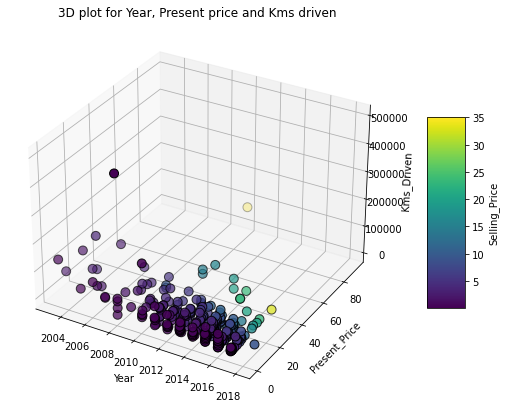

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(14,7))
ax  = fig.gca(projection = "3d")

plot =  ax.scatter(df["Year"],df["Present_Price"],df["Kms_Driven"],linewidth=1,edgecolor ="k",c=df["Selling_Price"],s=80)

ax.set_xlabel("Year")
ax.set_ylabel("Present_Price")
ax.set_zlabel("Kms_Driven")

label = fig.colorbar(plot,shrink=.5,aspect=5)
label.set_label("Selling_Price")

plt.title("3D plot for Year, Present price and Kms driven")
plt.show()

We can observe that most of the cars accumulate around after 2010, have low present price and selling price.

<h1>4. Data Cleaning </h1>

In [14]:
#check missing or null values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

There is no null values in the dataset

<h1>5. Feature Extraction </h1>

In [15]:
final = df[['Year','Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [16]:
final['Current_Year'] = 2020
final['num_year'] = final['Current_Year'] - final['Year']
final.drop(['Year','Current_Year'], axis=1, inplace=True)

In [17]:
final.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,num_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [18]:
final = pd.get_dummies(final, drop_first=True)

In [19]:
X = final.iloc[:,1:]
y = final.iloc[:,0]

In [20]:
### Feature Importance
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [21]:
print(model.feature_importances_)

[0.40548684 0.04029614 0.00083022 0.08190888 0.19032163 0.02194125
 0.13513713 0.1240779 ]


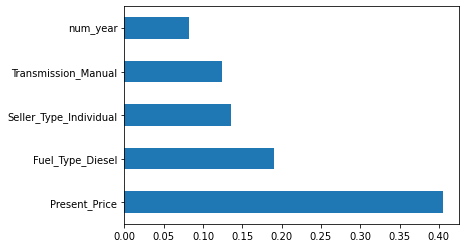

In [22]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

<h2>5.1. Understanding correlation between the features</h2>

<AxesSubplot:>

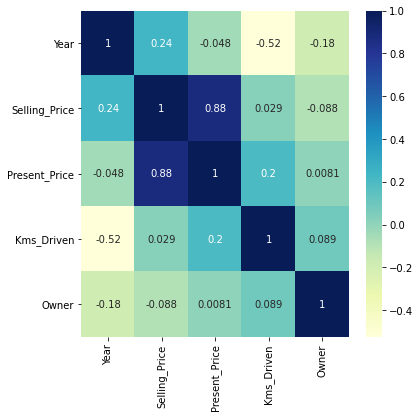

In [23]:
correlations = df.corr()
indx=correlations.index
plt.figure(figsize=(6,6))
sns.heatmap(df[indx].corr(),annot=True,cmap="YlGnBu")

It can be observed that Present_Price and Selling_Price are highly correlated

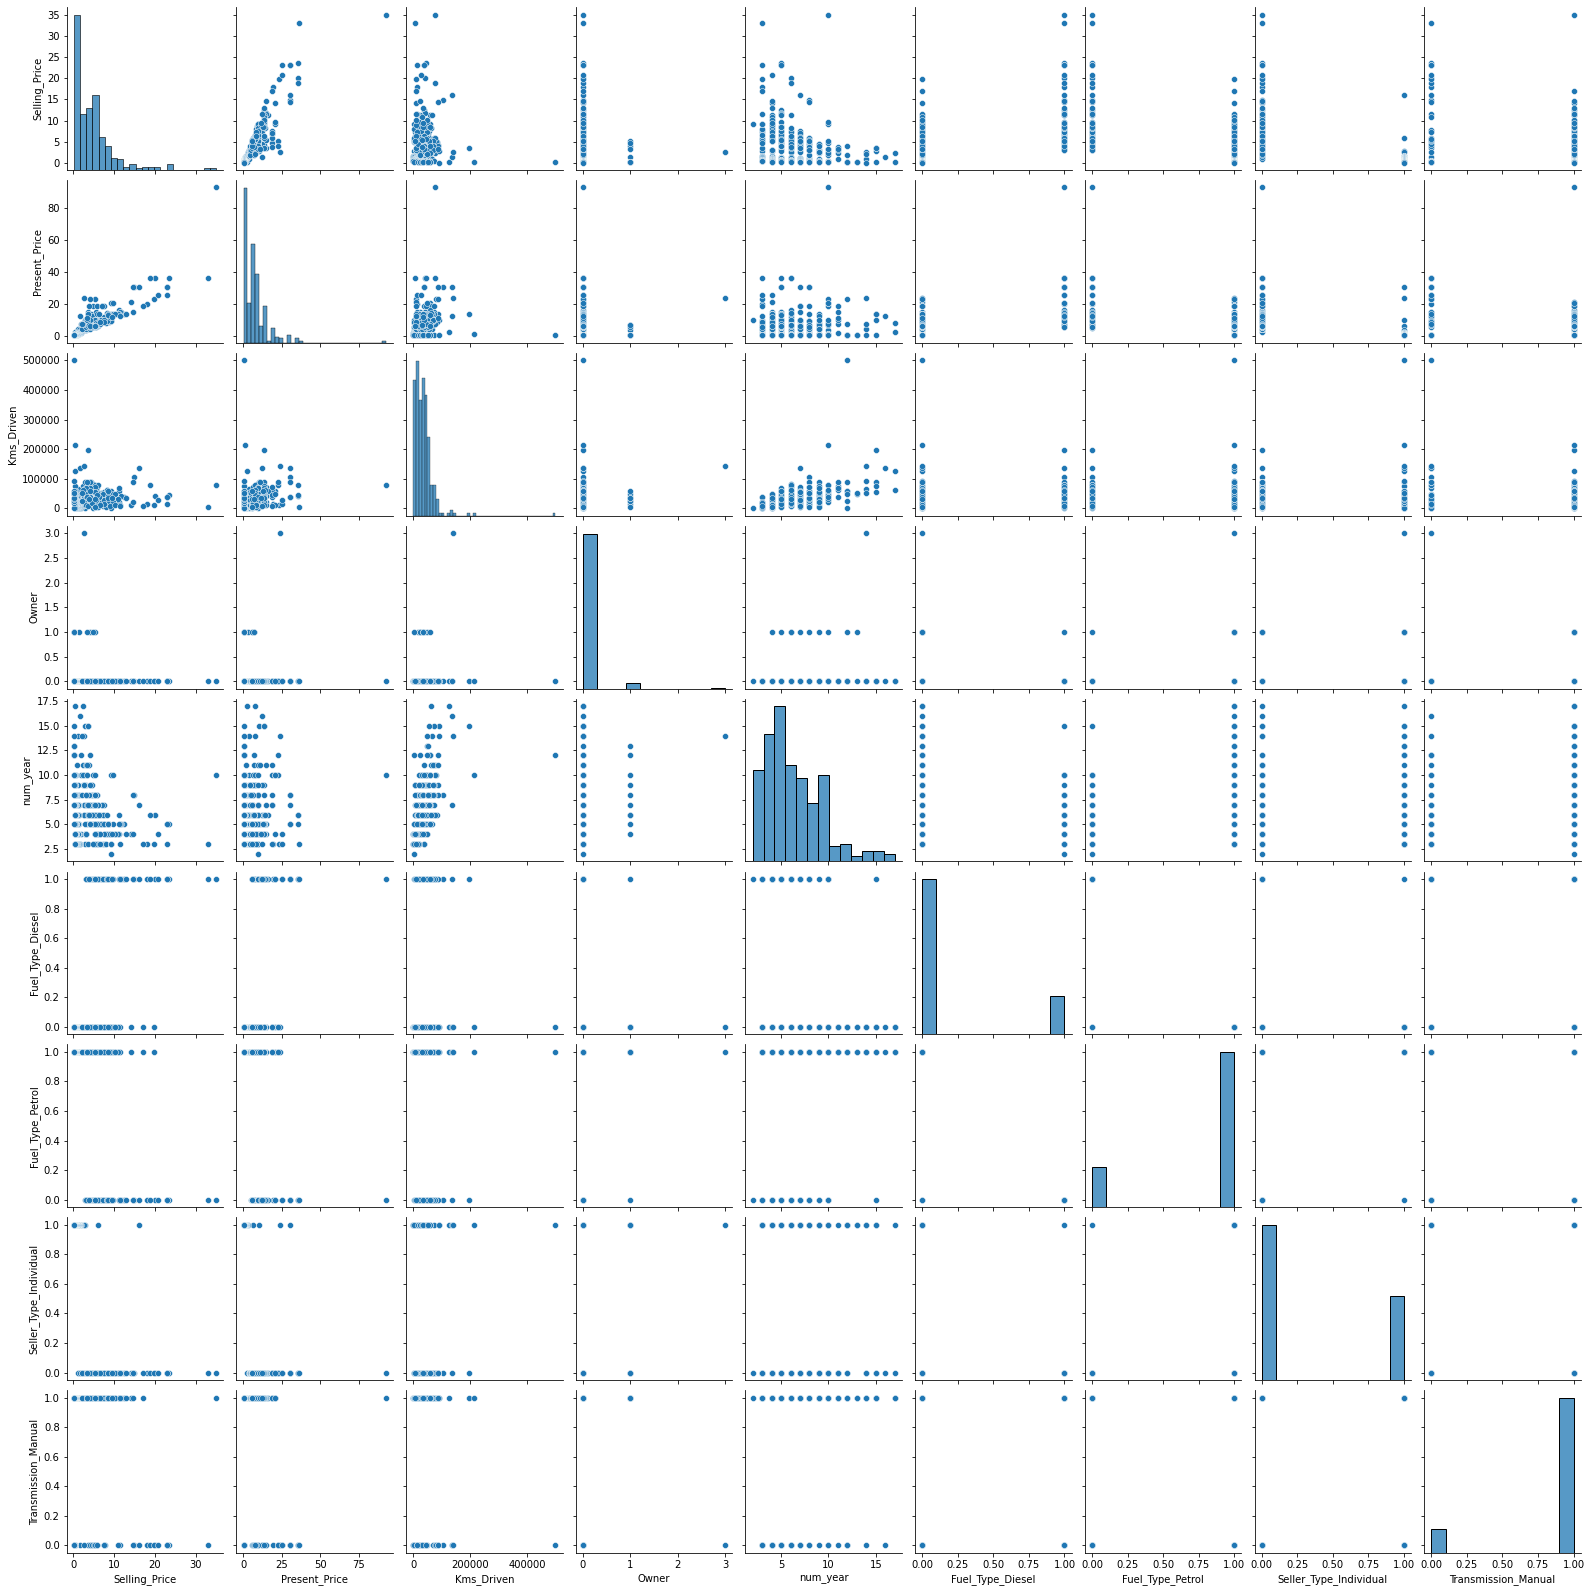

In [24]:
sns.pairplot(final)

<h1>6. Train Test Split </h1>

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [26]:
X_train.shape

(240, 8)

In [27]:
X_test.shape

(61, 8)

<h1>7. Machine Learning Models</h1>

<h2>Linear Regression</h2>

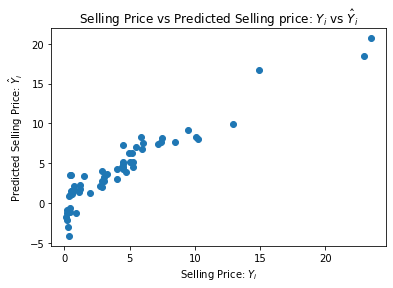

In [29]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Selling Price: $Y_i$")
plt.ylabel("Predicted Selling Price: $\hat{Y}_i$")
plt.title("Selling Price vs Predicted Selling price: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [30]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 2.6599350160871014


<h2>Random Forest Regressor</h2>

In [31]:
#Randomized Search CV
n_estimators = [int(x) for x in range(100,1201,100)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, 6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]

In [32]:
random_grid = {'n_estimators' : n_estimators, 'max_features' : max_features, 'max_depth' : max_depth, 'min_samples_split' : min_samples_split, 'min_samples_leaf' : min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [33]:
rf = RandomForestRegressor()

In [34]:
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=10, verbose=2, random_state=42, n_jobs=-1)

In [35]:
rf_random.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    6.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   15.9s finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [36]:
#getting the best estimators
rf_random.best_estimator_

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [37]:
#getting the best params
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [38]:
rf = RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [39]:
rf.fit(X_test, y_test)

RandomForestRegressor(max_depth=25, max_features='sqrt', n_estimators=1000)

In [40]:
y_pred = rf.predict(X_test)

In [41]:
y_pred

array([ 3.49341,  4.8565 ,  9.04204,  4.56906,  6.56482,  3.23365,
        4.32733,  4.60495,  0.25506, 11.23618,  4.58481,  7.7401 ,
        3.30311,  0.77202,  0.55394,  4.52233,  5.41415, 20.44981,
        0.8393 ,  4.5851 ,  0.55306,  6.3853 ,  0.44256,  0.35627,
        5.01395,  0.62711,  2.86089,  4.07786,  5.85922,  5.2864 ,
        7.97663,  3.41129, 21.15158,  3.2738 ,  3.66575,  0.65406,
        1.17816,  0.80427,  0.79992,  2.27191,  0.76832,  0.28406,
        0.49018,  9.27504,  0.61302,  7.0478 ,  0.50521,  0.48775,
        0.61354,  1.03432,  1.10718, 15.61413,  0.27365,  5.87033,
        4.45414,  9.09252,  6.1036 ,  5.22985,  0.38585,  2.93314,
        5.0295 ])

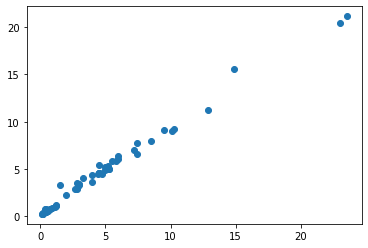

In [42]:
plt.scatter(y_test, y_pred)

C:\Users\ayand\.conda\envs\carprediction\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

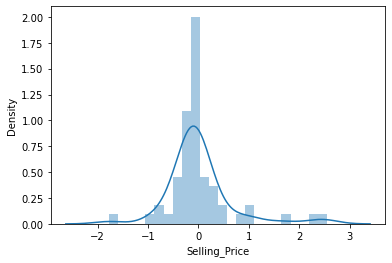

In [43]:
sns.distplot(y_test-y_pred)

In [44]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 0.4183394959491815


<h2>XGBoost</h2>

In [45]:
xgb = xgboost.XGBRegressor()

In [46]:
#Hyperparamter_Tuning
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]
base_score=[0.25,0.5,0.75,1]

# Define the grid of hyperparameters to search
parameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [47]:
# Set up the random search with 10-fold cross validation
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions=parameter_grid, cv=10, n_iter=50,
                               scoring='neg_mean_absolute_error', n_jobs=-1, verbose=5,
                               return_train_score=True, random_state=42)

#train on the RandomSearchCv object to get best estimators
xgb_random.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 432 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 477 out of 500 | elapsed:    7.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    8.1s finished


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100,...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=-1,
                   para

In [48]:
#getting the best estimators
xgb_random.best_estimator_

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
#getting the best params
xgb_random.best_params_

{'n_estimators': 900,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.1,
 'booster': 'gbtree',
 'base_score': 1}

In [50]:
xgb = xgboost.XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
xgb.fit(X_test, y_test)

XGBRegressor(base_score=1, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
y_pred = rf.predict(X_test)

In [53]:
y_pred

array([ 3.49341,  4.8565 ,  9.04204,  4.56906,  6.56482,  3.23365,
        4.32733,  4.60495,  0.25506, 11.23618,  4.58481,  7.7401 ,
        3.30311,  0.77202,  0.55394,  4.52233,  5.41415, 20.44981,
        0.8393 ,  4.5851 ,  0.55306,  6.3853 ,  0.44256,  0.35627,
        5.01395,  0.62711,  2.86089,  4.07786,  5.85922,  5.2864 ,
        7.97663,  3.41129, 21.15158,  3.2738 ,  3.66575,  0.65406,
        1.17816,  0.80427,  0.79992,  2.27191,  0.76832,  0.28406,
        0.49018,  9.27504,  0.61302,  7.0478 ,  0.50521,  0.48775,
        0.61354,  1.03432,  1.10718, 15.61413,  0.27365,  5.87033,
        4.45414,  9.09252,  6.1036 ,  5.22985,  0.38585,  2.93314,
        5.0295 ])

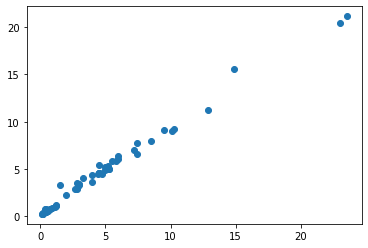

In [54]:
plt.scatter(y_test, y_pred)

C:\Users\ayand\.conda\envs\carprediction\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

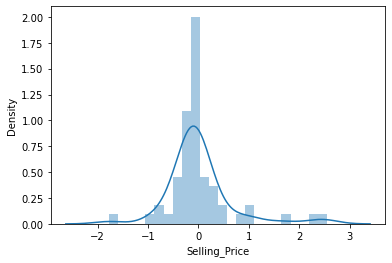

In [55]:
sns.distplot(y_test-y_pred)

In [56]:
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

MSE: 0.4183394959491815


In [59]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["Model", "MSE"]
x.add_row(["Linear Regression", 2.6599350160871014])
x.add_row(["Random Forest", 0.4183394959491815])
x.add_row(["XGBoost", 0.4183394959491815])

print(x)

+-------------------+--------------------+
|       Model       |        MSE         |
+-------------------+--------------------+
| Linear Regression | 2.6599350160871014 |
|   Random Forest   | 0.4183394959491815 |
|      XGBoost      | 0.4183394959491815 |
+-------------------+--------------------+


In [61]:
#saving the model to a pickle file
import pickle
file = open('xgboost_regression_model.pkl', 'wb')
pickle.dump(xgb, file)